# Gradient boosting

## O que é?

Gradient boosting é um algoritmo de aprendizado por comitê, baseado em árvores de decisão.
Semelhante às Random Forests, o Gradient Boosting utiliza um conjunto de árvores de decisão. Partindo de um valor "aleatório" (pode ser a média de todos os valores alvo), esse algoritmo tenta predizer o a diferença entre o valor original e valor gerado anteriormente. Depois o valor gerado inicialmente é somado com o valor predito na árvore (escalonado pelo índice de aprendizado "learning rate"), consequentemente todos os valores gerados nas próximas árvores são escalonados e somados ao valor inicial. Isso diminui a diferença entre o valor inicial e o valor original.

$y_{pred} = Av+Lr*T_1 + Lr * T_2 + Lr * T_3 + ... + Lr * T_n$  ------> $y_{pred} = Av+Lr(T_1+T_2+T_3+...+T_n)$
Onde _Av_ é o valor inicial (normalmente a média dos valores alvos), _Lr_ é o coeficiente de aprendizado (0-1) e _Tn_ é o resultado previsto pela árvore n

## Exemplo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

### Classificação

In [2]:
# importando
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification #Gerar classes aleatórias 

from sklearn.ensemble import RandomForestClassifier

In [3]:
#Cria 5000 exemplos com 6 variáveis independentes, saída 1 ou 0
X, y = make_classification(n_samples=5000, n_features=6, shuffle=True) 

#Dividindo dados em treino e teste utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
gb = GradientBoostingClassifier(random_state=0, loss='deviance', learning_rate=0.1, n_estimators =50)
gb.fit(X_train, y_train)

sc_gb = gb.score(X_test, y_test)
print(sc_gb)

0.988


### Regressão

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

from sklearn.tree import DecisionTreeRegressor

In [6]:
#Gera regressão com valores aleatórios, 1000 linhas e 4 colunas além da variável alvo
X, y = make_regression(n_samples = 1000, n_features = 4, shuffle = True, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [7]:
gbr = GradientBoostingRegressor(random_state=2, learning_rate=0.1, n_estimators =50)
gbr.fit(X_train, y_train)

sc_gbr = gbr.score(X_test, y_test)
print(sc_gbr)

0.9466042591515982


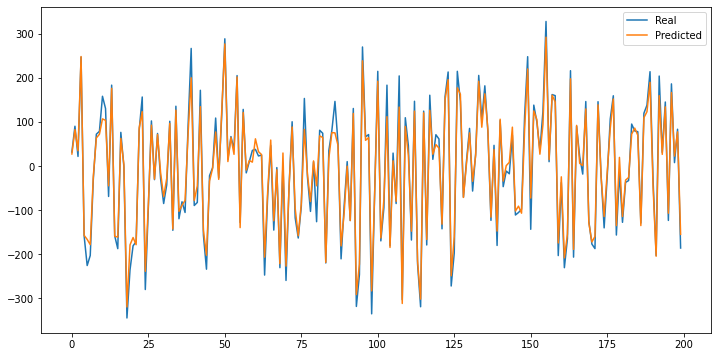

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y[800:], label='Real')
plt.plot(gbr.predict(X)[800:], label='Predicted')
plt.legend()
plt.show()

### Ações do facebook

In [9]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 1, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

In [10]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,10)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9
9,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002,78.449997
10,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002
11,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002
12,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002
13,77.650002,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000


In [11]:
#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4','Close 5','Close 6','Close 7','Close 8','Close 9']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [47]:
grad_bst = GradientBoostingRegressor(random_state = 0, learning_rate=0.1, n_estimators=100, loss='ls', max_depth=3)
grad_bst.fit(X_train, Y_train)

Y_pred = grad_bst.predict(X_test)

print(grad_bst.score(X_test, Y_test))

0.971962703901847


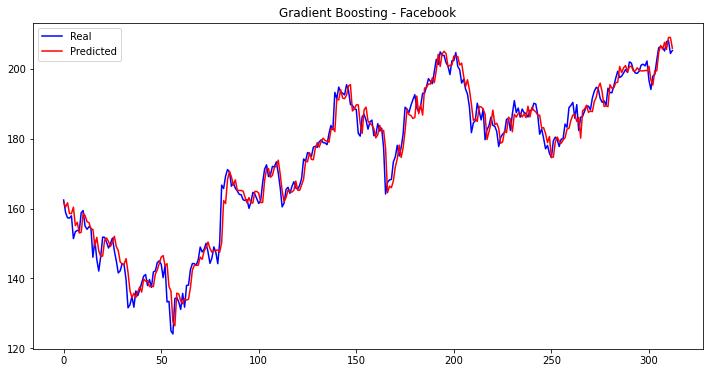

0.9739127746073408


In [18]:
plt.figure(figsize=(12,6))
plt.title('Gradient Boosting - Facebook')

plt.plot(Y_test, color='blue', label='Real')
plt.plot(Y_pred, color='red', label='Predicted')

plt.legend()
plt.show()

print(grad_bst.score(X_test, Y_test))